## Importing required librarires

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
loan = pd.read_csv("loan.csv")


C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\1446152367.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

In [11]:
# loan.drop("id", axis = 1, inplace = True)
# loan.head()

In [7]:
loan.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [8]:
loan1 = loan[~loan.tax_liens.isnull()].copy()

In [9]:
loan1.tax_liens.isnull().sum()

0

In [10]:
loan1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
loan.shape

(39717, 110)

In [13]:
loan.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=110)

In [14]:
#Percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 110, dtype: float64

In [15]:
#Removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)


Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [16]:
loan = loan.drop(missing_columns, axis = 1)
print(loan.shape)

(39717, 54)


In [17]:
#Sumaarize number of missing values again
100*(loan.isnull().sum()/len(loan.index))

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [33]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent

# let's have a look at a few entries in the columns
# loan.loc[:, ['desc','mths_since_last_delinq']].head()

In [19]:
#Dropping the two columns
loan = loan.drop(['desc','mths_since_last_delinq'], axis = 1)


In [20]:
100*(loan.isnull().sum()/len(loan.index))

member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths           

In [21]:
#missing values in rows
loan.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [22]:
#checking whether some rows have more than 5 missing value
len(loan[loan.isnull().sum(axis=1) >5].index)

0

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [25]:
# The column int_rate is character type, let's convert it to float
# loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'] = loan['int_rate'].str.replace('%', '').astype(float)/100

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [27]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column
loan = loan[~loan['emp_length'].isnull()]

# using expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38642 non-null  int64  
 1   loan_amnt                   38642 non-null  int64  
 2   funded_amnt                 38642 non-null  int64  
 3   funded_amnt_inv             38642 non-null  float64
 4   term                        38642 non-null  object 
 5   int_rate                    38642 non-null  float64
 6   installment                 38642 non-null  float64
 7   grade                       38642 non-null  object 
 8   sub_grade                   38642 non-null  object 
 9   emp_title                   37202 non-null  object 
 10  emp_length                  38642 non-null  int64  
 11  home_ownership              38642 non-null  object 
 12  annual_inc                  38642 non-null  float64
 13  verification_status         386

## Data Analysis 

In [29]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [31]:
loan1 = loan.drop(behaviour_var, axis = 1)
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38642 non-null  int64  
 1   loan_amnt                   38642 non-null  int64  
 2   funded_amnt                 38642 non-null  int64  
 3   funded_amnt_inv             38642 non-null  float64
 4   term                        38642 non-null  object 
 5   int_rate                    38642 non-null  float64
 6   installment                 38642 non-null  float64
 7   grade                       38642 non-null  object 
 8   sub_grade                   38642 non-null  object 
 9   emp_title                   37202 non-null  object 
 10  emp_length                  38642 non-null  int64  
 11  home_ownership              38642 non-null  object 
 12  annual_inc                  38642 non-null  float64
 13  verification_status         386

In [34]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well
loan1 = loan.drop(['title','url','zip_code','addr_state'], axis = 1)
loan1

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


##### Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [35]:
loan1['loan_status'] = loan['loan_status'].astype('category')
loan1['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [37]:
# filtering only fully paid or charged-off
loan1 = loan1[loan1['loan_status'] != 'Current']
loan1['loan_status'] = loan1['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan1['loan_status'] = loan1['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan1['loan_status'].value_counts()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\3628788077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['loan_status'] = loan1['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\3628788077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['loan_status'] = loan1['loan_status'].apply(lambda x: pd.to_numeric(x))


0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis

In [38]:
#Default rate
round(np.mean(loan1['loan_status']), 2)

0.14

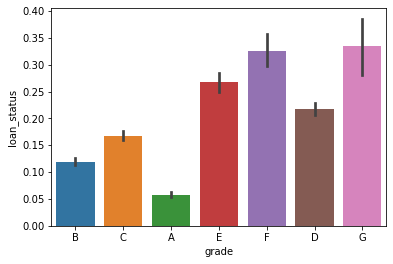

In [39]:
# plotting default rates across grade of the loan
sns.barplot(x = 'grade', y = 'loan_status', data = loan1)
plt.show()

In [40]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x = cat_var, y = 'loan_status', data = loan1)
    plt.show()

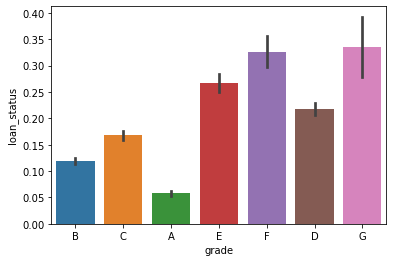

In [41]:
#comapring default rates across grade of loan
plot_cat('grade')

#### Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.

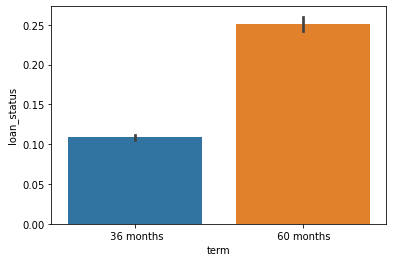

In [42]:
# term: 60 months loans default more than 36 months loans
plot_cat('term')

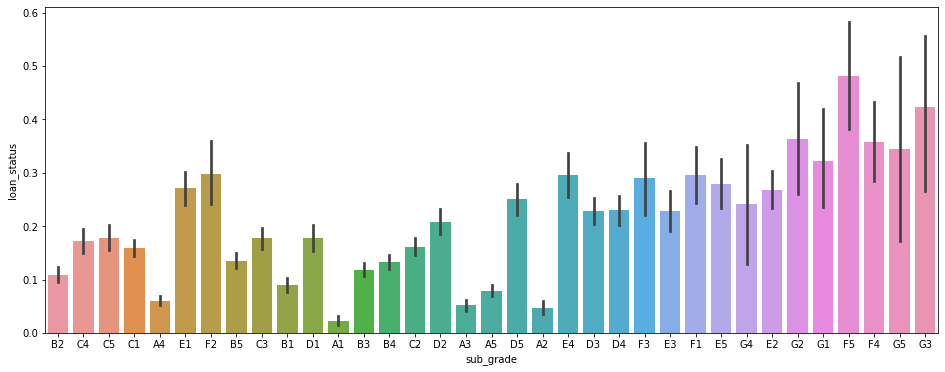

In [44]:
# sub-grade: as expected - A1 is better than A2 better than A3
plt.figure(figsize=(16,6))
plot_cat('sub_grade')

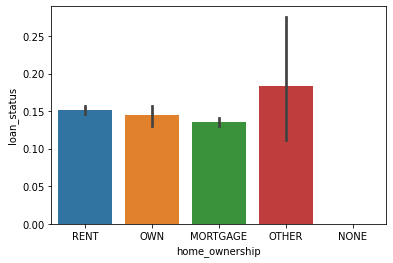

In [45]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

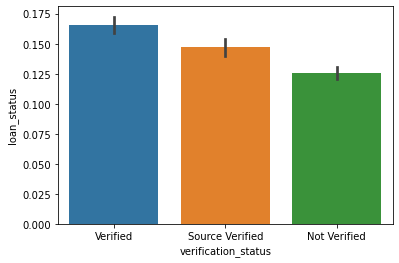

In [46]:
# verification_status: surprisingly, verified loans default more t
plot_cat('verification_status')

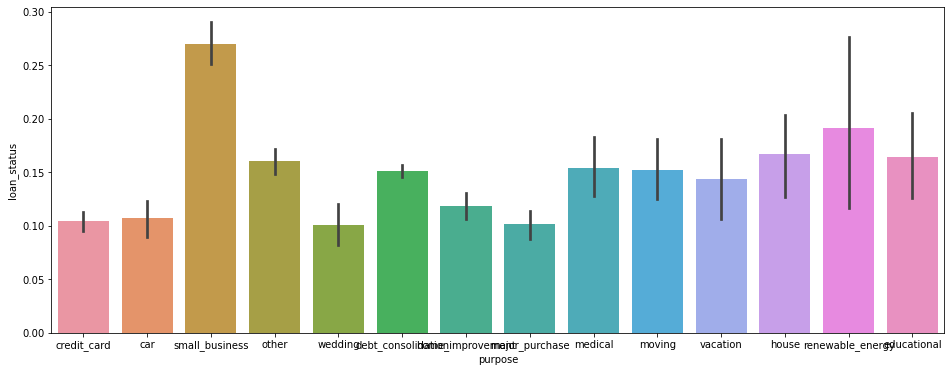

In [48]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16,6))
plot_cat('purpose')

In [49]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [51]:
from datetime import datetime
loan1['issue_d'] = loan1['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\1422917590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['issue_d'] = loan1['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))


In [52]:
#extracting mont and year from issue date
loan1['month'] = loan1['issue_d'].apply(lambda x: x.month)
loan1['year'] = loan1['issue_d'].apply(lambda x: x.year)

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\2046340594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['month'] = loan1['issue_d'].apply(lambda x: x.month)
C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\2046340594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['year'] = loan1['issue_d'].apply(lambda x: x.year)


In [53]:
# let's first observe the number of loans granted across years
loan1.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [54]:
# number of loans across months
loan1.groupby('month').month.count()
#Most loans are granted in December, and in general in the 
#latter half of the year

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

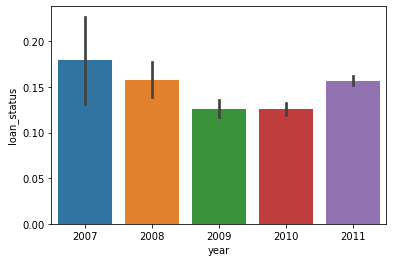

In [55]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('year')

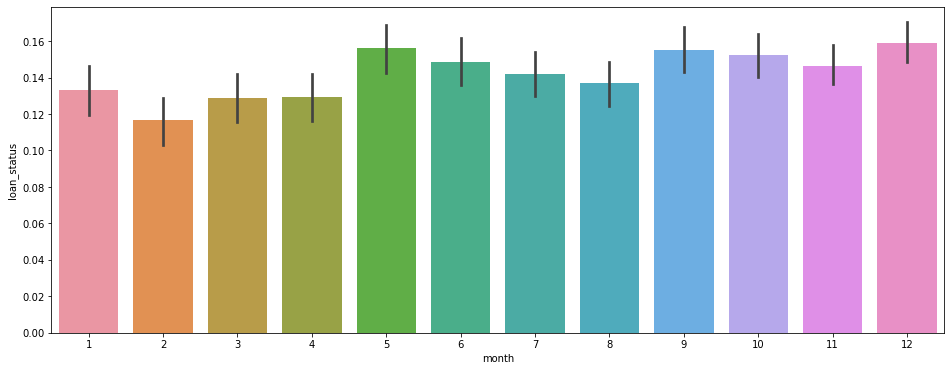

In [56]:
# comparing default rates across months: not much variation acros
plt.figure(figsize = (16,6))
plot_cat('month')

C:\Users\Mihir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


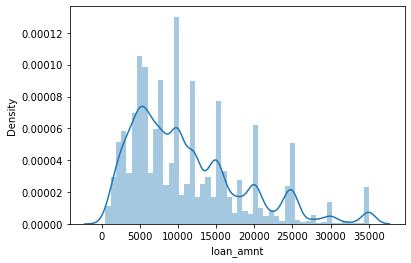

In [58]:
#Loan amount: the median loan amount is around 10,000
sns.distplot(loan1['loan_amnt'])
plt.show()

##### The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

##### Let's bin the loan amount variable into small, medium, high, very high. 

In [59]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan1['loan_amnt'] = loan1['loan_amnt'].apply(lambda x: loan_amount(x))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\3610727214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['loan_amnt'] = loan1['loan_amnt'].apply(lambda x: loan_amount(x))


In [60]:
loan1['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

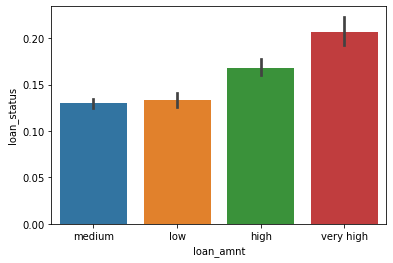

In [61]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [63]:
# let's also convert funded amount invested to bins
loan1['funded_amnt_inv'] = loan1['funded_amnt_inv'].apply(lambda x: loan_amount(x))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\1138112246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['funded_amnt_inv'] = loan1['funded_amnt_inv'].apply(lambda x: loan_amount(x))


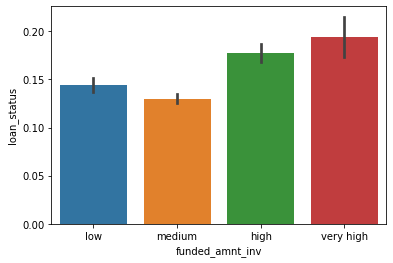

In [64]:
#funded_amount invested
plot_cat('funded_amnt_inv')

In [71]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan1['int_rate'] = loan1['int_rate'].apply(lambda x: int_rate(x))

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
# comparing default rates across rates of interest
# high interest rates default more, as expected 
plot_cat('int_rate')


In [73]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan1['dti'] = loan1['dti'].apply(lambda x: dti(x))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\2291066615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['dti'] = loan1['dti'].apply(lambda x: dti(x))


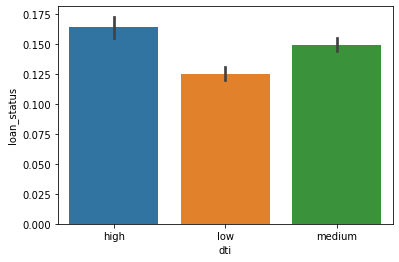

In [74]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

In [76]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loan1['funded_amnt'] = loan1['funded_amnt'].apply(lambda x: funded_amount(x))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\884429694.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['funded_amnt'] = loan1['funded_amnt'].apply(lambda x: funded_amount(x))


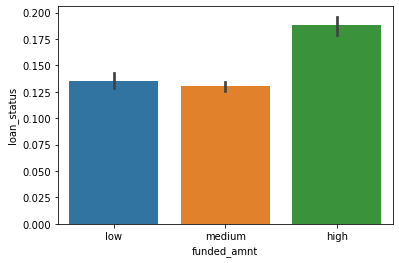

In [77]:
plot_cat('funded_amnt')

In [79]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan1['installment'] = loan1['installment'].apply(lambda x: installment(x))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\308784005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['installment'] = loan1['installment'].apply(lambda x: installment(x))


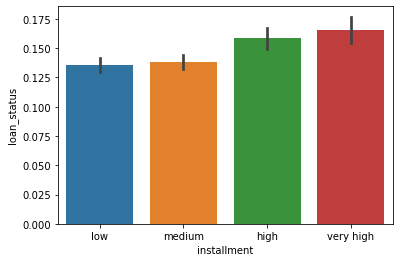

In [80]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

In [82]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan1['annual_inc'] = loan1['annual_inc'].apply(lambda x: annual_income(x))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\2774081703.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1['annual_inc'] = loan1['annual_inc'].apply(lambda x: annual_income(x))


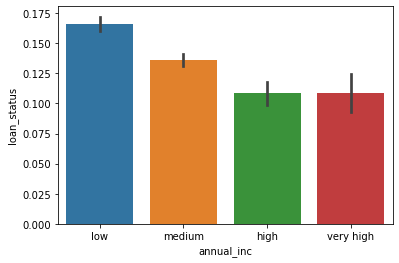

In [83]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat('annual_inc')

In [87]:
# employment length
# first, let's drop the missing value observations in emp length
loan1 = loan1[~loan1['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan1['emp_length'] = loan1['emp_length'].apply(lambda x: emp_length(x))

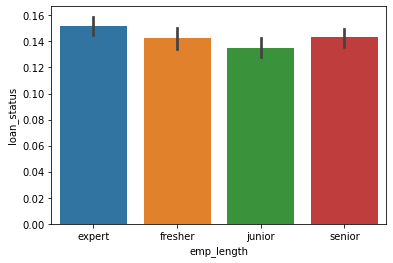

In [88]:
# emp_length and default rate
# not much of a predictor of default
plot_cat('emp_length')

### Segmented Univariate Analysis

##### In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

###### This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

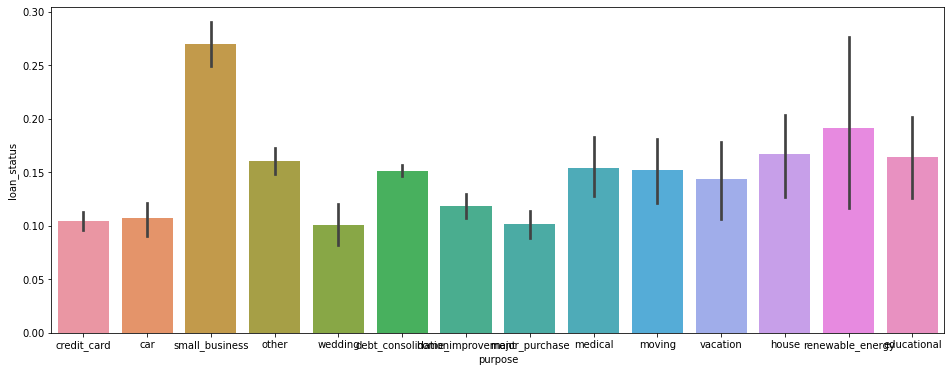

In [89]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

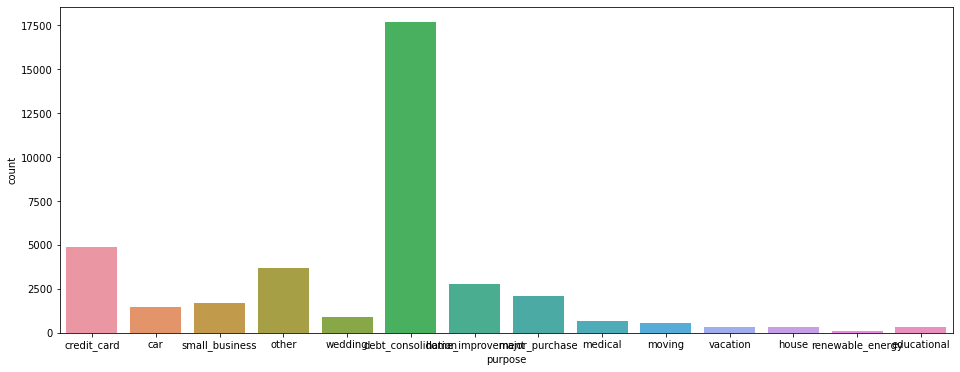

In [91]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=loan1)
plt.show()

In [92]:
# filtering the df for the 4 types of loans of top 
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan1 = loan1[loan1['purpose'].isin(main_purposes)]
loan1['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

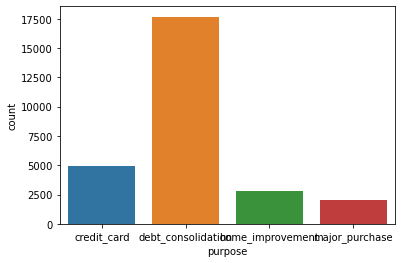

In [94]:
# plotting number of loans by purpose 
sns.countplot(x=loan1['purpose'])
plt.show()

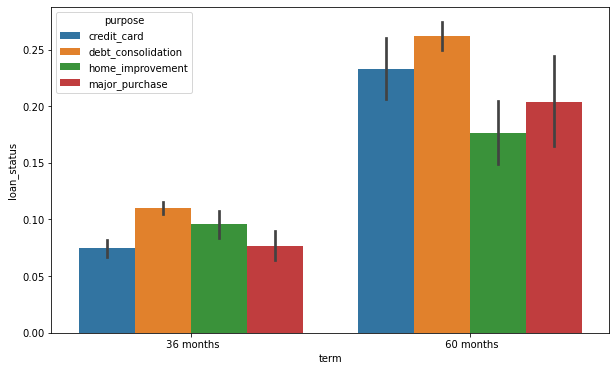

In [96]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan1)
plt.show()


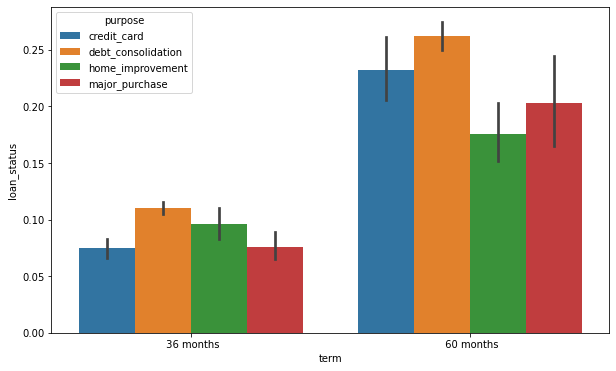

In [97]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan1)
    plt.show()

    
plot_segmented('term')

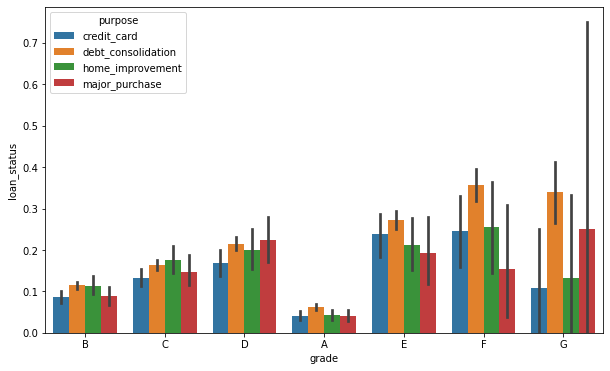

In [98]:
# grade of loan
plot_segmented('grade')

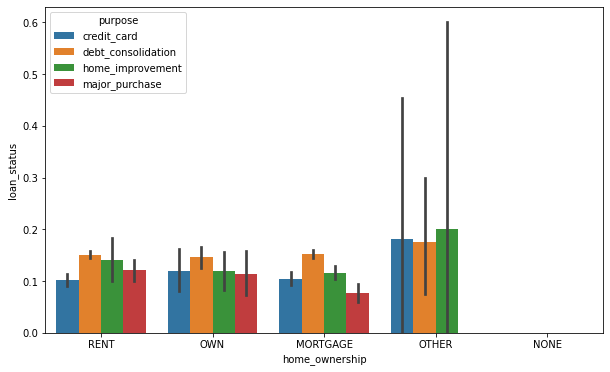

In [99]:
plot_segmented('home_ownership')

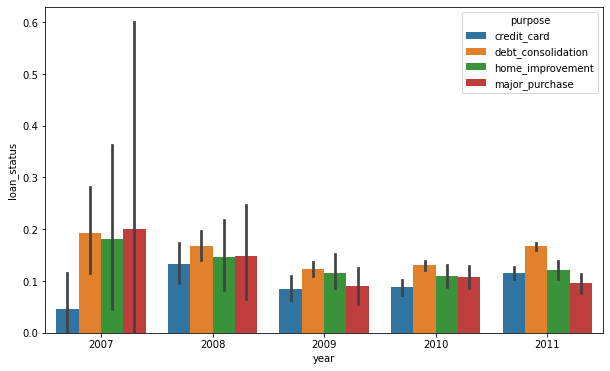

In [100]:
# year
plot_segmented('year')

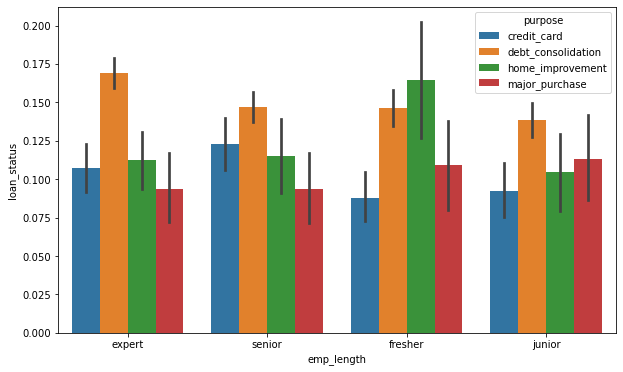

In [101]:
# emp_length
plot_segmented('emp_length')

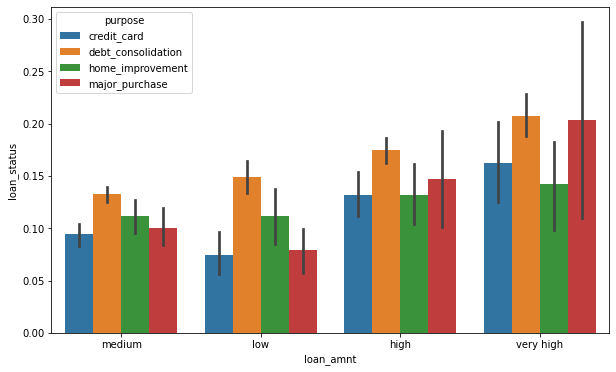

In [102]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

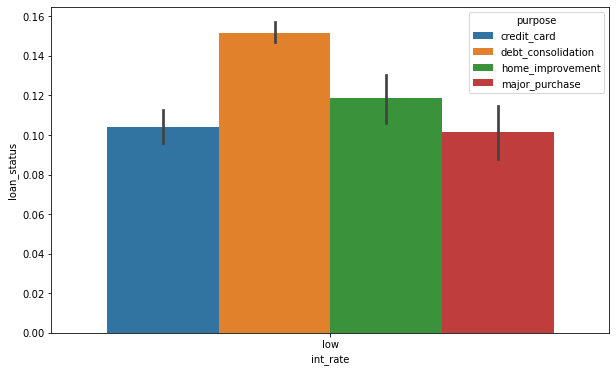

In [103]:
# interest rate
plot_segmented('int_rate')

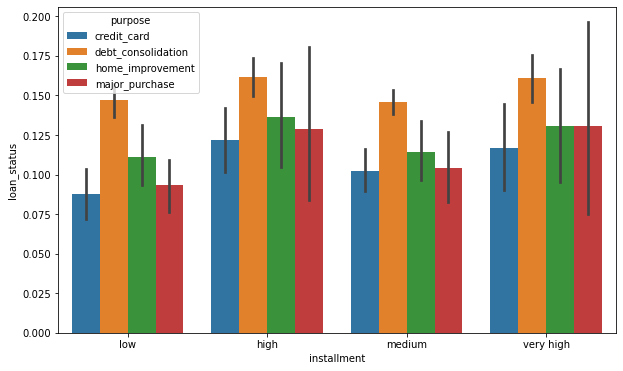

In [104]:
# installment
plot_segmented('installment')

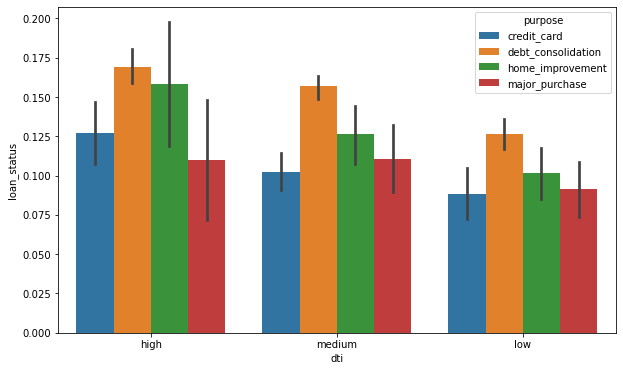

In [105]:
# debt to income ratio
plot_segmented('dti')

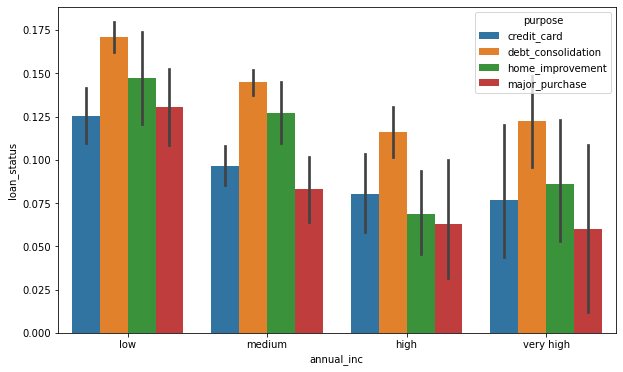

In [106]:
# annual income
plot_segmented('annual_inc')

#### A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

In [108]:
# variation of default rate across annual_inc

loan1.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [110]:
# one can write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = loan1.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [113]:
# filtering all the object type variables
df_categorical = loan1.loc[:, loan1.dtypes == object]
df_categorical['loan_status'] = loan1['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in loan1.columns])

['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


C:\Users\Mihir\AppData\Local\Temp\ipykernel_17020\2950830130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['loan_status'] = loan1['loan_status']


In [114]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 0.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'earliest_cr_line': 100.0, 'revol_util': 100.0, 'initial_list_status': 0.0, 'last_pymnt_d': 75.0, 'last_credit_pull_d': 47.0, 'application_type': 0.0}
